##**Sentimen Analisis Review APK Gojek**

Analisis sentimen merupakan bagian penting dari pemrosesan bahasa alami yang memungkinkan identifikasi otomatis apakah ulasan bersifat positif, nertal atau negatif. Proyek ini membantu memahami umpan balik pengguna guna mendukung perbaikan dan pengembangan aplikasi secara lebih tepat.

Proyek ini akan mengeksplorasi analisis sentimen guna memahami bagaimana pengguna merasakan dan menyampaikan opini mereka mengenai aplikasi di Google Play Store khususnya aplikasi Gojek.

Dalam proyek ini, akan digunakan dasar-dasar analisis sentimen, mulai dari pengolahan teks dan ekstraksi fitur hingga penerapan model machine learning menggunakan Python serta pustaka seperti NLTK, scikit-learn, dan TensorFlow.

##Instalasi dan Import Library

In [1]:
# Instalasi library google-play-scraper
!pip install google-play-scraper
from google_play_scraper import reviews_all, reviews, Sort

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.3 MB/s eta 0:00:00


In [2]:
# Menginstall library Sastrawi
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00


In [116]:
# Library Manipulasi dan Analisis Data
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
import csv # Membaca dan menulis file CSV di Python
from io import StringIO # Membuat objek seperti file dari string
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas

# Library Data Waktu dan Format String
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string # Berisi konstanta string, seperti tanda baca

# Library Eksternal/HTTP & Penyimpanan
import requests # Mengirim permintaan HTTP (GET, POST, dll.) dari Python ke internet atau API.
import pickle # Menyimpan dan memuat objek Python ke/dari file.

# Library Visualisasi Data
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from wordcloud import WordCloud # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

# Library preprocessing teks
from nltk.tokenize import word_tokenize # Tokenisasi teks
from nltk.corpus import stopwords # Daftar kata-kata berhenti dalam teks
from nltk import download as nltk_unduh
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory # Menghapus kata-kata berhenti dalam bahasa Indonesia

# Library Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Library Deep Learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten, GRU, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback, ReduceLROnPlateau
# from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop

In [4]:
# Mengunduh dependensi NLTK
nltk_unduh('punkt')
nltk_unduh('punkt_tab')
nltk_unduh('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Memuat Dataset Ulasan Aplikasi Gojek
Dataset ulasan pengguna aplikasi Gojek dimuat dari file CSV yang sebelumnya diambil melalui scraping dari Google Play Store. Dataset ini memiliki dua kolom utama: `content` (teks ulasan) dan `score` (rating 1-5).

In [5]:
reviews_gojek_df = pd.read_csv("https://raw.githubusercontent.com/viapiyaaa/Submission_Proyek-Analisis-Sentimen_Evi-Afiyatus/refs/heads/main/ulasan_gojek.csv")

# Menampilkan beberapa baris awal dari dataset
reviews_gojek_df.head()

,content,score
0,terlalu terlalu terlalu... apk yg tidak bisa d...,1
1,"Gak usah pasang tarif tarif hemat, soalnya par...",1
2,tinggal 2menit lg driver sampe di lokasi tiba-...,1
3,sebagai pengguna lama baru kali ini saya kecew...,1
4,susah untuk dpt driver walaupun di map ada ban...,1


##Exploratory Data Analysis (EDA)

In [6]:
# Menampilkan informasi dasar dari dataset
reviews_gojek_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117000 entries, 0 to 116999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  116999 non-null  object
 1   score    117000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [7]:
# Mengecek apakah ada nilai kosong di setiap kolom
print(reviews_gojek_df.isnull().sum())

content    1
score      0
dtype: int64


In [8]:
# menghapus baris yang mengandung nilai kosong (missing values/NaN)
clean_df = reviews_gojek_df.dropna()

In [9]:
# Menampilkan informasi dasar dari dataset setelah pembersihan
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116999 entries, 0 to 116999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  116999 non-null  object
 1   score    116999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ MB


##Visualisasi Distribusi Rating Ulasan
Menganalisis sebaran sentimen pengguna berdasarkan rating (1-5).

In [10]:
# Menampilkan jumlah ulasan berdasarkan masing-masing skor
print(clean_df['score'].value_counts())

score
1    49220
5    38502
2    10655
3    10279
4     8343
Name: count, dtype: int64


<ipython-input-11-080ef6c01b72>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=clean_df['score'], palette='Blues')


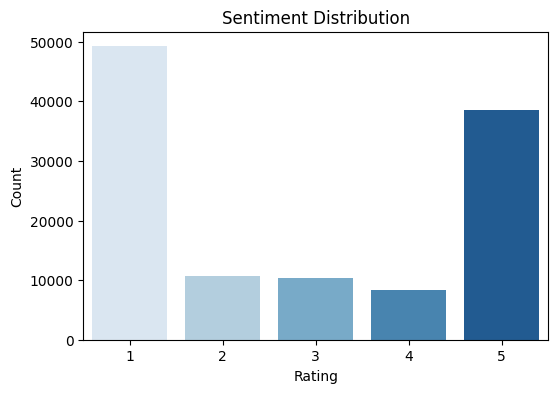

In [11]:
# Visualisasi distribusi rating dari ulasan pengguna aplikasi gojek
plt.figure(figsize=(6, 4))
sns.countplot(x=clean_df['score'], palette='Blues')
plt.title("Sentiment Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

##Text Preprocessing

1. **`cleaningText(text)`**:
   - Membersihkan teks dengan menghapus:
     - Mention (@username)
     - Hashtag (#hashtag)
     - Teks "RT" (retweet)
     - URL/link (http://...)
     - Angka
     - Karakter non-alfanumerik selain spasi
   - Mengganti baris baru dengan spasi, menghapus tanda baca, dan menghilangkan spasi ekstra di awal dan akhir teks.

2. **`casefoldingText(text)`**:
   - Mengubah semua karakter dalam teks menjadi huruf kecil (lowercase), untuk menghindari perbedaan kapitalisasi kata dalam analisis.

3. **`tokenizingText(text)`**:
   - Memecah teks menjadi daftar kata (token) menggunakan fungsi `word_tokenize()` dari NLTK.

4. **`filteringText(text)`**:
   - Menghapus stopwords (kata umum yang tidak membawa makna penting, seperti "di", "dan", "itu") dari teks.
   - Menggunakan stopwords dari bahasa Indonesia dan Inggris, serta beberapa kata tambahan yang relevan untuk konteks analisis.

5. **`stemmingText(text)`**:
   - Melakukan stemming, yaitu mengubah kata ke bentuk dasarnya (root word). Misalnya, "berlari" menjadi "lari".
   - Menggunakan stemmer dari pustaka Sastrawi untuk bahasa Indonesia.

6. **`toSentence(list_words)`**:
   - Menggabungkan daftar kata menjadi sebuah kalimat (teks), dengan setiap kata dipisahkan oleh spasi.

In [12]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Menghapus mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # Menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # Menghapus RT
    text = re.sub(r"http\S+", '', text) # Menghapus link
    text = re.sub(r'[0-9]+', '', text) # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # Menghapus angka


    text = text.replace('\n', ' ') # Mengganti baris baru menjadi spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # Menghapus tanda baca
    text = text.strip(' ') # Menghapus karakter spasi awal dan akhir
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Tokenisasi atau pemisahan string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Hapus kata kunci dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Meringkas kata menjadi akar katanya yang melekat pada sufiks dan prefiks atau pada akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Ubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

**Pemrosesan Kata Slang (Bahasa Gaul)**

In [13]:
slangwords = {"dr": "dari", "sm": "sama", "mauu": "mau", "udh": "sudah", "mantul": "mantap betul", "aneh": "tidak biasa", "orderan": "pesanan", "ojol": "ojek online", "driver": "pengemudi", "ngebut": "melaju cepat", "cancel": "batal", "topup": "isi ulang", "gopay": "saldo Gojek", "gocar": "layanan mobil Gojek", "goride": "layanan motor Gojek", "gosend": "layanan pengiriman Gojek", "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak": "tidak", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [14]:
# Menggabungkan daftar token menjadi satu kalimat
def gabungkan_ke_kalimat(tokens):
    return ' '.join(tokens)

# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(lambda x: x.lower().split())

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

##Pelabelan

**Memuat Leksikon Sentimen (Daftar Kata Positif & Negatif)**

In [15]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/masdevid/ID-OpinionWords/refs/heads/master/positive.txt')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter='\n')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah baris baru

    for row in reader:
        if row:  # Pastikan baris tidak kosong
            lexicon_positive[row[0]] = 1
            # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/masdevid/ID-OpinionWords/refs/heads/master/negative.txt')
# Mengirim permintaan HTTP untuk mendapatkan file CSV negatif dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter='\n')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah baris baru

    for row in reader:
        if row:  # Pastikan baris tidak kosong
            lexicon_negative[row[0]] = -1
            # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

# Tampilkan statistik leksikon
print(f"Jumlah kata positif: {len(lexicon_positive)}")
print(f"Jumlah kata negatif: {len(lexicon_negative)}")

Jumlah kata positif: 1182
Jumlah kata negatif: 2402


**Menentukan Sentimen Ulasan Berdasarkan Leksikon**

Setiap kata positif akan menambah nilai skor ulasan sebesar +1, sedangkan setiap kata negatif akan menguranginya sebesar –1. Nilai akhir dari skor ini digunakan untuk menentukan label sentimen sebagai berikut:

*   Skor positif (> 0): dikategorikan sebagai positif
*   Skor negatif (< 0): dikategorikan sebagai negatif
*   Skor nol (= 0): dikategorikan sebagai netral.

In [16]:
# Menentukan label sentimen berdasarkan leksikon
def sentiment_analysis(teks):
    score = 0
    for kata in teks:
        if kata in lexicon_positive:
            score += 1
        if kata in lexicon_negative:
            score -= 1

    if score > 0:
        sentiment  = 'positive'
    elif score < 0:
        sentiment  = 'negative'
    else:
        sentiment  = 'neutral'

    return score, sentiment

In [17]:
# Terapkan pelabelan sentimen ke kolom 'text_stopword'
results = clean_df['text_stopword'].apply(sentiment_analysis)
results = list(zip(*results))
clean_df['sentiment_score'] = results[0]
clean_df['sentiment'] = results[1]
print(clean_df['sentiment'].value_counts())

sentiment
positive    44065
neutral     41118
negative    31816
Name: count, dtype: int64


**Visualisasi Distribusi Sentimen Ulasan Gojek**

Setelah pelabelan sentimen, kita akan menampilkan diagram pie untuk menunjukkan proporsi ulasan yang bersentimen positif, negatif, dan netral.

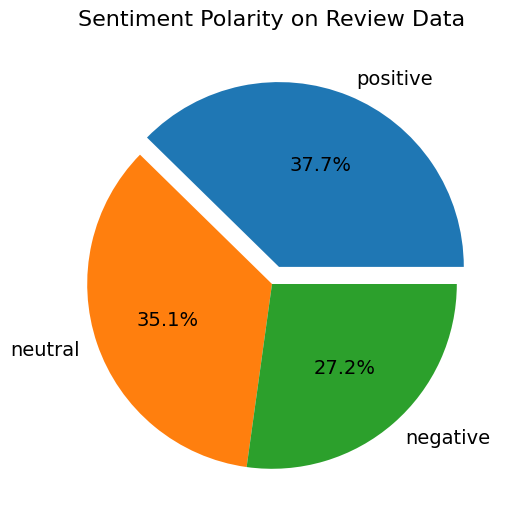

In [24]:
# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['sentiment'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['sentiment'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [28]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan sentiment positif.
positive_tweets = clean_df[clean_df['sentiment'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'sentiment_score', 'sentiment','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'sentiment_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='sentiment_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [29]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan sentiment negatif.
negative_tweets = clean_df[clean_df['sentiment'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'sentiment_score', 'sentiment','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'sentiment_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='sentiment_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

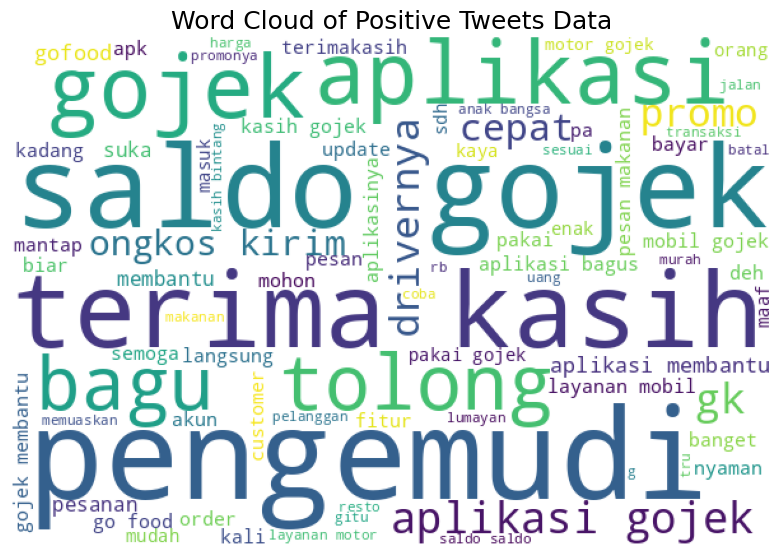

In [32]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

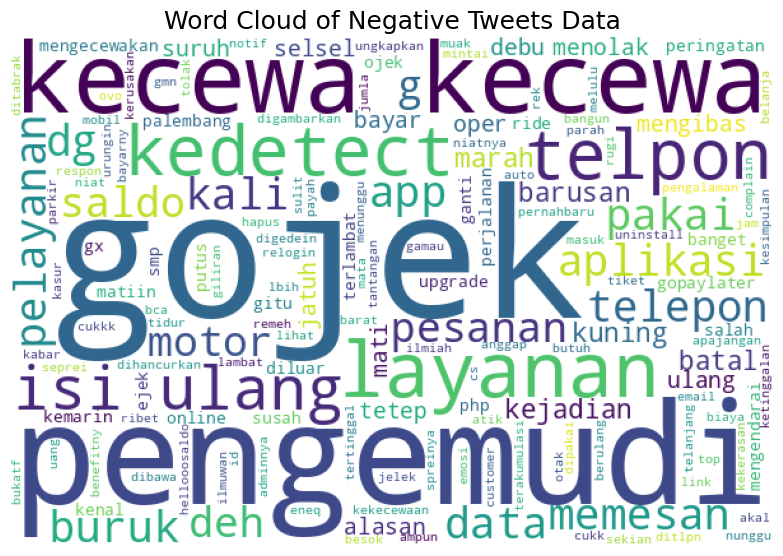

In [30]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

**Visualisasi Histogram Skor Sentimen positif, negatif, atau netral.**

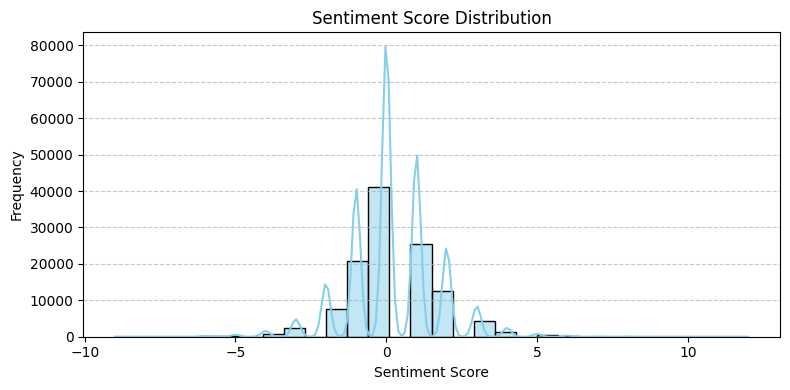

In [35]:
# Tampilkan distribusi skor sentimen menggunakan histogram
plt.figure(figsize=(8, 4))
sns.histplot(clean_df['sentiment_score'], bins=30, kde=True, color='skyblue')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Data Preparation


In [36]:
# Ambil kolom 'clean_content' sebagai fitur (X) dan 'sentimen' sebagai label (y)
x = clean_df['text_akhir']
y = clean_df['sentiment'].map({'positive': 2, 'neutral': 1, 'negative': 0})

##Feature Engineering

Ekstraksi Fitur dengan **TF-IDF (Term Frequency-Inverse Document Frequency)**

In [37]:
# Transformasi teks ke vektor angka menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
x_tfidf = tfidf.fit_transform(x)

# Menampilkan dimensi data hasil vektorisasi
print("Ringkasan Fitur dan Data:")
print(f"Dimensi fitur TF-IDF: {x_tfidf.shape}")

Ringkasan Fitur dan Data:
Dimensi fitur TF-IDF: (116999, 10000)


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

# Vektorisasi
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(clean_df['text_akhir'])

# Menampilkan dimensi data hasil vektorisasi
print("Ringkasan Fitur dan Data:")
print(f"Dimensi fitur TF-IDF: {X_bow.shape}")

Ringkasan Fitur dan Data:
Dimensi fitur TF-IDF: (116999, 88490)


## **Studi Kasus 1: Algoritma Logistic Regression dengan Bag of Words (BoW) (70/30)**

**Data Splitting**

In [111]:
# Membagi Data menjadi Set Train dan Test
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.3, random_state=42)

print("Total Sampel:")
print(f"Set train: {X_train_bow.shape[0]} sampel")
print(f"Set test: {X_test_bow.shape[0]} sampel")

Total Sampel:
Set train: 81899 sampel
Set test: 35100 sampel


**Pelatihan dan Prediksi Model Logistic Regression**

In [75]:
# Inisialisasi Model Logistic Regression
model_bow = LogisticRegression(max_iter=1000)

# Latih Model
model_bow.fit(X_train_bow, y_train_bow)

# Lakukan Prediksi
y_pred_bow = model_bow.predict(X_test_bow)

**Evaluasi Model Logistic Regression**

In [80]:
# Evaluasi Model
train_accuracy_bow = accuracy_score(y_train_bow, model_bow.predict(X_train_bow))
accuracy_bow = accuracy_score(y_test_bow, y_pred_bow)

print(f'Akurasi Train: {train_accuracy_bow:.4f}')
print(f'Akurasi Test: {accuracy_bow:.4f}')

print(f'')
print(classification_report(y_test_bow, y_pred_bow, target_names=['negatif', 'netral', 'positif']))

Akurasi Train: 0.9915
Akurasi Test: 0.9530

              precision    recall  f1-score   support

     negatif       0.96      0.95      0.95      9437
      netral       0.93      0.94      0.94     12487
     positif       0.96      0.97      0.97     13176

    accuracy                           0.95     35100
   macro avg       0.95      0.95      0.95     35100
weighted avg       0.95      0.95      0.95     35100



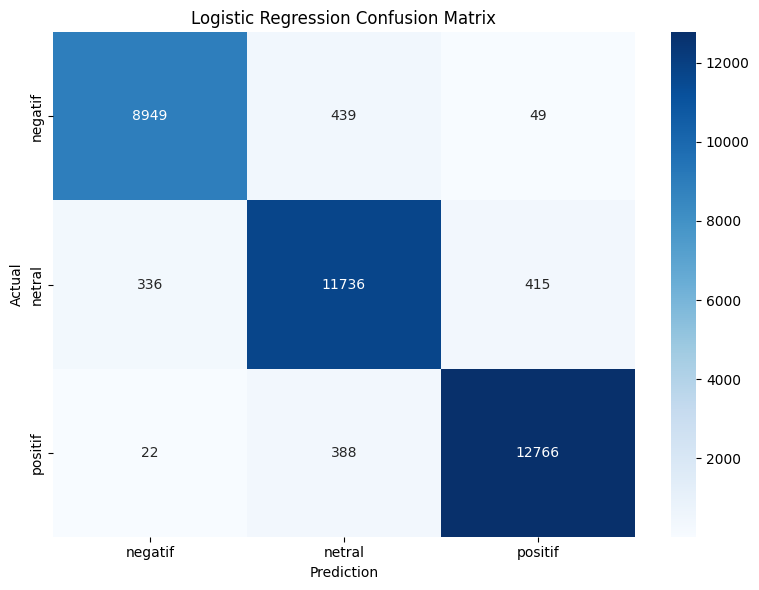

In [81]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_bow, y_pred_bow)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'netral', 'positif'],
            yticklabels=['negatif', 'netral', 'positif'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## **Studi Kasus 2: Algoritma Logistic Regression dengan TF-IDF (80/20)**

**Data Splitting**

In [82]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

print("Jumlah Sampel: ")
print(f"Set Latih: {X_train_tfidf.shape[0]} sampel")
print(f"Set Uji: {X_test_tfidf.shape[0]} sampel")

Jumlah Sampel: 
Set Latih: 93599 sampel
Set Uji: 23400 sampel


**Inisialisasi, Pelatihan dan Prediksi Model Logistic Regression**

In [83]:
# Inisialisasi Model Logistic Regression
model_tfidf = LogisticRegression(max_iter=1000)

# Latih Model
model_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Lakukan Prediksi
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

**Evaluasi Model Logistic Regression**

In [84]:
# Evaluasi Model
train_accuracy_tfidf = accuracy_score(y_train_tfidf, model_tfidf.predict(X_train_tfidf))
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)

print(f'Akurasi Train: {train_accuracy_tfidf:.4f}')
print(f'Akurasi Test: {accuracy_tfidf:.4f}')

print("\nLaporan Klasifikasi:")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=['negatif', 'netral', 'positif']))

Akurasi Train: 0.9410
Akurasi Test: 0.9086

Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.92      0.90      0.91      6311
      netral       0.86      0.90      0.88      8395
     positif       0.94      0.93      0.94      8694

    accuracy                           0.91     23400
   macro avg       0.91      0.91      0.91     23400
weighted avg       0.91      0.91      0.91     23400



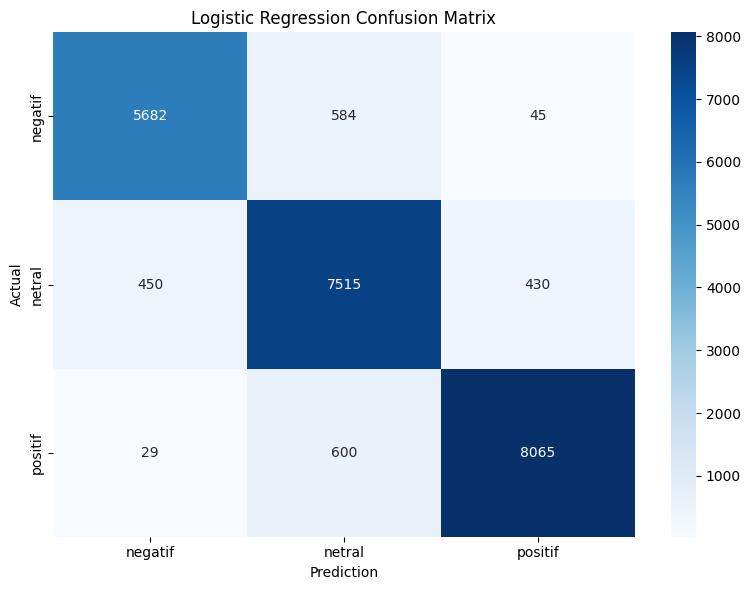

In [110]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_tfidf, y_pred_tfidf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negatif', 'netral', 'positif'],
            yticklabels=['negatif', 'netral', 'positif'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## **Kasus 3 : Deep Learning LSTM dengan Embedding (70/15/15)**

**Praprocessing Teks Model LSTM**

In [88]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x)
x_sekuensial = tokenizer.texts_to_sequences(x)
x_padat = pad_sequences(x_sekuensial, maxlen=100)

In [91]:
# Menghitung jumlah kelas sentimen
number_of_classes = len(np.unique(y))
print(f"Jumlah kelas: {number_of_classes}")
print(f"Dimensi urutan fitur: {x_padat.shape}")

vocabulary_index = tokenizer.word_index
print(f"Ukuran kosa kata: {len(vocabulary_index)} kata")

Jumlah kelas: 3
Dimensi urutan fitur: (116999, 100)
Ukuran kosa kata: 88516 kata


**Data Splitting**

In [93]:
# Pertama, pisahkan 15% data untuk testing
x_temp, x_test_lstm, y_temp, y_test_lstm = train_test_split(
    x_padat, y, test_size=0.15, random_state=42
)

# pisahkan 15% dari sisa (85%) untuk validasi => 15% / 85% ≈ 0.176
x_train_lstm, x_validation_lstm, y_train_lstm, y_validation_lstm = train_test_split(
    x_temp, y_temp, test_size=0.176, random_state=42
)

print(f"Set train: {x_train_lstm.shape[0]} sampel")
print(f"Set validation : {x_validation_lstm.shape[0]} sampel")
print(f"Set test: {x_test_lstm.shape[0]} sampel")

Set train: 81945 sampel
Set validation : 17504 sampel
Set test: 17550 sampel


**Membangun dan Melatih Model LSTM**

In [94]:
# Membuat model LSTM untuk klasifikasi sentimen
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    SpatialDropout1D(0.4),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),
    Dense(3, activation='softmax')
])

# Menyusun model dengan loss dan optimizer
model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [96]:
# Callback untuk kontrol pelatihan
callback_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
callback_lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=1,
    min_lr=1e-6
)

# Daftar callback
callbacks = [callback_early_stopping, callback_lr_reduction]

In [97]:
# Menjalankan pelatihan model
training_history = model_lstm.fit(
    x_train_lstm, y_train_lstm,
    validation_data=(x_validation_lstm, y_validation_lstm),
    epochs=15,
    batch_size=64,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/15
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 447s 345ms/step - accuracy: 0.7125 - loss: 0.6441 - val_accuracy: 0.9313 - val_loss: 0.2102 - learning_rate: 0.0010
Epoch 2/15
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 497s 341ms/step - accuracy: 0.9335 - loss: 0.2014 - val_accuracy: 0.9544 - val_loss: 0.1422 - learning_rate: 0.0010
Epoch 3/15
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 442s 341ms/step - accuracy: 0.9616 - loss: 0.1263 - val_accuracy: 0.9714 - val_loss: 0.1074 - learning_rate: 0.0010
Epoch 4/15
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 444s 343ms/step - accuracy: 0.9741 - loss: 0.0901 - val_accuracy: 0.9803 - val_loss: 0.0769 - learning_rate: 0.0010
Epoch 5/15
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 442s 343ms/step - accuracy: 0.9819 - loss: 0.0687 - val_accuracy: 0.9834 - val_loss: 0.0651 - learning_rate: 0.0010
Epoch 6/15
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 440s 342ms/step - accuracy: 0.9860 - loss: 0.0551 - val_accuracy: 0.9863 - val_loss: 0.0585 - learning_rate: 0.0010
Epoch 7/15
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 443s 342ms

**Evaluasi dan Visualisasi Performa Model LSTM**

In [112]:
# Mengambil nilai akurasi pelatihan terakhir
train_accuracy = training_history.history['accuracy']

# Evaluasi terhadap data pengujian
test_loss, accuracy_lstm = model_lstm.evaluate(x_test_lstm, y_test_lstm)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model LSTM")
print(f"Akurasi train per epoch terakhir: {train_accuracy[-1]:.4f}")
print(f"Akurasi test akhir: {accuracy_lstm:.4f}")

# Prediksi terhadap data uji
y_prediksi = np.argmax(model_lstm.predict(x_test_lstm), axis=1)

# Menampilkan laporan klasifikasi berdasarkan label sebenarnya
print("\nLaporan Klasifikasi:")
print(classification_report(y_test_lstm, y_prediksi, target_names=['negatif', 'netral', 'positif']))

549/549 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.9901 - loss: 0.0477

Evaluasi Model LSTM
Akurasi train per epoch terakhir: 0.9941
Akurasi test akhir: 0.9902


549/549 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step

Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.99      0.99      0.99      4746
      netral       0.98      0.99      0.99      6286
     positif       0.99      0.99      0.99      6518

    accuracy                           0.99     17550
   macro avg       0.99      0.99      0.99     17550
weighted avg       0.99      0.99      0.99     17550



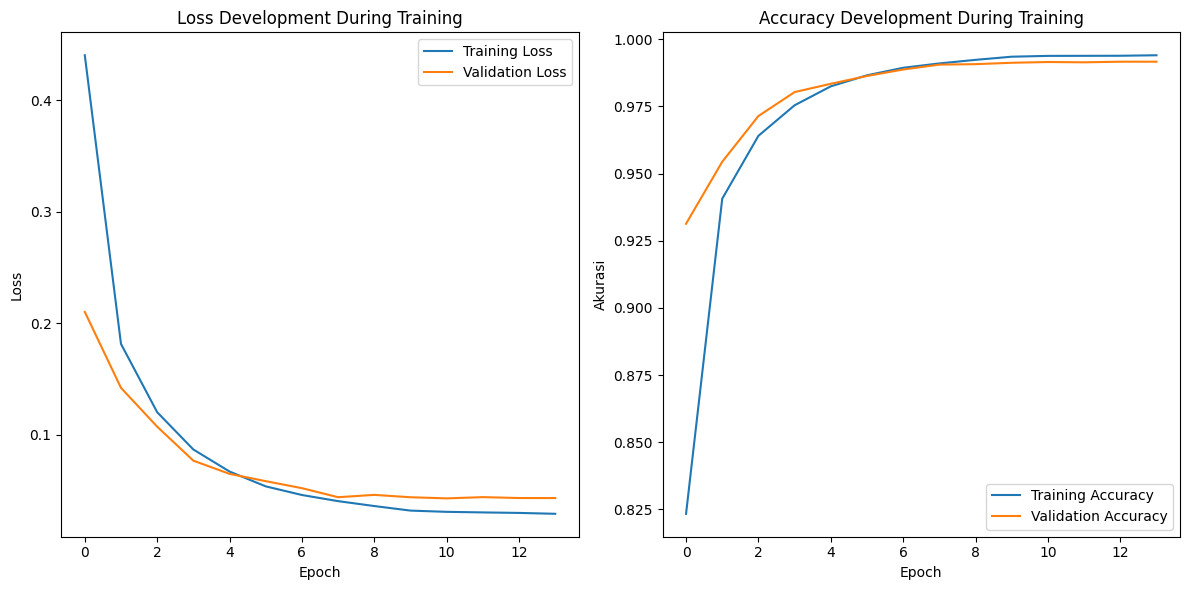

In [113]:
# Visualisasi loss dan akurasi selama pelatihan
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Development During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Development During Training')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

**Visualisasi Confusion Matrix Model LSTM**

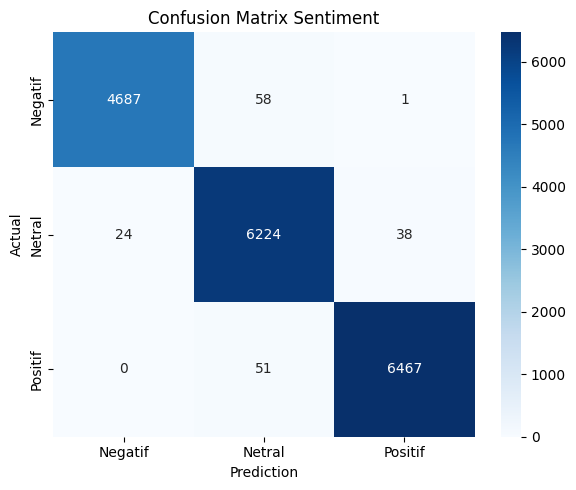

In [114]:
# Membuat confusion matrix
confus_matrix = confusion_matrix(y_test_lstm, y_prediksi)

# Menentukan label kelas
category_labels = ['Negatif', 'Netral', 'Positif']

# Menampilkan confusion matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confus_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=category_labels, yticklabels=category_labels)
plt.title('Confusion Matrix Sentiment')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**Akurasi, Precision, Recall, dan F1-score dari Confusion Matrix**

In [115]:
# Ambil nilai dari confusion matrix
TN, FP, FN, TP = None, None, None, None  # placeholder untuk binary, kita hitung secara multi-kelas

# Mengambil nilai matrix
cm = confusion_matrix(y_test_lstm, y_prediksi)
print("Confusion Matrix:")
print(cm)

# Hitung metrik per kelas
for i, kelas in enumerate(['Negatif', 'Netral', 'Positif']):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    print(f"\nKelas: {kelas}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")

# Hitung akurasi keseluruhan
total_accuracy = np.trace(cm) / np.sum(cm)
print(f"\nAkurasi Keseluruhan: {total_accuracy:.4f}")

Confusion Matrix:
[[4687   58    1]
 [  24 6224   38]
 [   0   51 6467]]

Kelas: Negatif
  Precision: 0.9949
  Recall:    0.9876
  F1-score:  0.9912

Kelas: Netral
  Precision: 0.9828
  Recall:    0.9901
  F1-score:  0.9864

Kelas: Positif
  Precision: 0.9940
  Recall:    0.9922
  F1-score:  0.9931

Akurasi Keseluruhan: 0.9902


## **Perbandingan Performa Model**

In [103]:
# Membuat tabel ringkasan performa model
summary = {
    'Model': ['Logistic Regression + BoW (70/30)', 'Logistic Regression + TF-IDF (80/20)', 'LSTM + Embedding (70/15/15)'],
    'Accuracy': [accuracy_bow, accuracy_tfidf, total_accuracy],  # gunakan nama variabel yang benar
    'Data Sharing Ratio': ['70/30', '80/20', '70/15/15'],
    'Feature Type': ['BoW', 'TF-IDF', 'Word Embedding',]
}

# Mengonversi ke DataFrame
summary_df = pd.DataFrame(summary)

# Format akurasi menjadi persen
summary_df['Accuracy'] = summary_df['Accuracy'].apply(lambda x: f"{x:.2%}")

# Menampilkan ringkasan
print("Ringkasan Hasil Evaluasi Model")
display(summary_df)

Ringkasan Hasil Evaluasi Model


,Model,Accuracy,Data Sharing Ratio,Feature Type
0,Logistic Regression + BoW (70/30),95.30%,70/30,BoW
1,Logistic Regression + TF-IDF (80/20),90.86%,80/20,TF-IDF
2,LSTM + Embedding (70/15/15),99.02%,70/15/15,Word Embedding


Dalam kasus analisis sentimen ini, model deep learning LSTM yang menggunakan ekstraksi fitur melalui embedding berhasil mencapai akurasi tertinggi sebesar 99,02%. Oleh karena itu, LSTM dengan pendekatan embedding dipilih sebagai model utama untuk memprediksi sentimen pada kalimat-kalimat baru.

## **Inference**

In [109]:
# Load tokenizer dan model
with open("../Models/tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

model_lstm = load_model("../Models/lstm_sentiment_model.h5")

# Kalimat Baru
kalimat_baru = [
    "aplikasinya bagus banget dan sangat membantu",      # Positif
    "mahal tapi drivernya baik",                         # Netral
    "sangat mengecewakan, sering error dan lambat"        # Negatif
]

# Preprocessing
kalimat_baru_cleaned = [cleaningText(kalimat) for kalimat in kalimat_baru]
kalimat_baru_casefolded = [casefoldingText(kalimat) for kalimat in kalimat_baru_cleaned]
kalimat_baru_slangfixed = [fix_slangwords(kalimat) for kalimat in kalimat_baru_casefolded]
kalimat_baru_tokenized = [kalimat.split() for kalimat in kalimat_baru_slangfixed]
kalimat_baru_filtered = [filteringText(kalimat) for kalimat in kalimat_baru_tokenized]
kalimat_baru_final = [toSentence(kalimat) for kalimat in kalimat_baru_filtered]

# Tokenizer Preprocessing
sekuens_baru = tokenizer.texts_to_sequences(kalimat_baru_final)
padat_baru = pad_sequences(sekuens_baru, maxlen=100)

# Model Prediction
hasil_prediksi = model_lstm.predict(padat_baru)

# Interpretasi
label_dict = {0: "negatif", 1: "netral", 2: "positif"}
label_sentimen = hasil_prediksi.argmax(axis=1)

# Tampilkan hasil
for i, kalimat in enumerate(kalimat_baru):
    print(f"Kalimat: {kalimat}")
    print(f"Prediksi Sentimen: {label_dict[label_sentimen[i]]}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Kalimat: aplikasinya bagus banget dan sangat membantu
Prediksi Sentimen: positif

Kalimat: mahal tapi drivernya baik
Prediksi Sentimen: netral

Kalimat: sangat mengecewakan, sering error dan lambat
Prediksi Sentimen: negatif

